In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [2]:
df = pd.read_csv('./data/dataset_cleaned_1.csv', index_col=0)

In [3]:
df.head()

,id,department,geo,role,will_relocate,percent_remote,emp_sat_onprem_1,emp_sat_onprem_2,emp_sat_onprem_3,emp_sat_onprem_4,...,emp_competitive_1,emp_competitive_2,emp_competitive_3,emp_competitive_4,emp_competitive_5,emp_collaborative_1,emp_collaborative_2,emp_collaborative_3,emp_collaborative_4,emp_collaborative_5
0,1,Operations,US,VP,0,0.4,3.0,3.0,4.0,3.0,...,2,4,2,2,2,2,2,2,1,5
1,2,Sales,UK,Senior Director,0,0.4,3.0,3.0,4.0,3.0,...,2,2,1,4,1,3,2,5,1,5
2,3,Finance,France,Senior Director,0,0.4,3.0,3.0,4.0,3.0,...,1,5,1,2,5,2,2,4,4,4
3,4,Human Resources,China,Senior Director,0,0.4,3.0,3.0,4.0,3.0,...,1,1,2,5,1,1,2,4,4,1
4,5,IT,Korea,Director,0,0.4,3.0,3.0,4.0,3.0,...,1,4,1,5,3,5,1,2,5,4


# 1.0 - Preprocessing | Features Selection

### 1.1 - Categorical Data

In [4]:
df.select_dtypes('object')

,department,geo,role,salary,gender
0,Operations,US,VP,low,M
1,Sales,UK,Senior Director,low,F
2,Finance,France,Senior Director,medium,F
3,Human Resources,China,Senior Director,high,M
4,IT,Korea,Director,low,F
...,...,...,...,...,...
14994,Operations,Korea,Level 2-4,medium,F
14995,Sales,Australia,Level 2-4,medium,F
14996,Finance,China,Level 2-4,low,F
14997,Human Resources,US,Level 2-4,medium,M


In [5]:
features_df = pd.DataFrame(index=df.index)

In [6]:
features_df['id'] = df['id']

In [7]:
# Label encoder
encoder = preprocessing.LabelEncoder()

In [8]:
# Encode with label encoder all columns with categorical data
for column in df.select_dtypes('object'):
    column_name = '{}_encoded'.format(column)
    features_df[column_name] = encoder.fit_transform(df[column])

In [9]:
features_df['gender_encoded'] = encoder.fit_transform(df.gender)

### 1.2 - Numeric Data

In [10]:
df_numbers = df.select_dtypes('number')

In [11]:
df_numbers.drop(['emp_sat_onprem_1', 'emp_sat_onprem_2', 'emp_sat_onprem_3', 'emp_sat_onprem_4', 'emp_sat_onprem_5'], axis=1, inplace=True)

/home/vinicius/Área de Trabalho/venvs/jupyter/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_numbers.drop(['emp_sat_remote_1', 'emp_sat_remote_2', 'emp_sat_remote_3', 'emp_sat_remote_4', 'emp_sat_remote_5'], axis=1, inplace=True)

In [13]:
df_numbers.drop(['men_leave', 'women_leave'], axis=1, inplace=True)

In [14]:
# Possibles Y by now
possible_y = df[['last_evaluation', 'left_company', 'will_relocate']]

In [15]:
df_numbers.drop(possible_y, axis=1, inplace=True)

In [16]:
df_numbers.drop('id', axis=1, inplace=True)

In [17]:
# Concat numeric and categorical X
features_df = pd.concat([features_df, df_numbers], axis=1)

In [18]:
features_df.isnull().sum()

id                       0
department_encoded       0
geo_encoded              0
role_encoded             0
salary_encoded           0
gender_encoded           0
percent_remote           0
emp_engagement_1         0
emp_engagement_2         0
emp_engagement_3         0
emp_engagement_4         0
emp_engagement_5         0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
linkedin_hits            0
emp_work_status2         0
emp_work_status_3        0
emp_work_status_4        0
emp_work_status_5        0
emp_identity             0
emp_role                 0
emp_position             0
emp_title                0
emp_competitive_1        0
emp_competitive_2        0
emp_competitive_3        0
emp_competitive_4        0
emp_competitive_5        0
emp_collaborative_1      0
emp_collaborative_2      0
emp_collaborative_3      0
emp_collaborative_4      0
emp_collaborative_5      0
dtype: int64

# 2.0 - Modeling

### 2.1 - Baseline Model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
'''
Possible models by now.
Model to predict evaluation (regression)
A model to predict if employee are willing to relocate
A model to predict if a employee will leave the company soon

First:
- Evaluation
'''

y = possible_y.last_evaluation

In [21]:
X_train, X_val, y_train, y_val = train_test_split(features_df, y, test_size=0.50, random_state=101)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(n_estimators=100)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
p = rf.predict(X_val)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mean_absolute_error(y_val, p)

8.368000000098181e-05

In [28]:
mean_squared_error(y_val, p)

4.585413333333618e-07

Very low error. overfit?

In [29]:
new_df = pd.DataFrame(index=y_val.index)

In [30]:
new_df['y_val'] = y_val

In [31]:
new_df['p'] = p

In [32]:
new_df['p'] = round(new_df.p, 2)

In [33]:
new_df.head()

,y_val,p
2786,0.53,0.53
9619,0.81,0.81
10356,0.84,0.84
2169,0.51,0.51
1139,0.48,0.48


In [34]:
new_df[new_df.y_val!=new_df.p].head()

,y_val,p
1568,0.50,0.49
6984,0.70,0.69
7392,0.71,0.72
771,0.47,0.46
10001,0.82,0.83


### 2.2 - Model Analysis/Explanation

In [35]:
import shap
shap.initjs()

In [36]:
explainer = shap.TreeExplainer(rf)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [37]:
shap_values = explainer.shap_values(X_train, approximate=True)

In [38]:
shap_values.shape

(7499, 36)

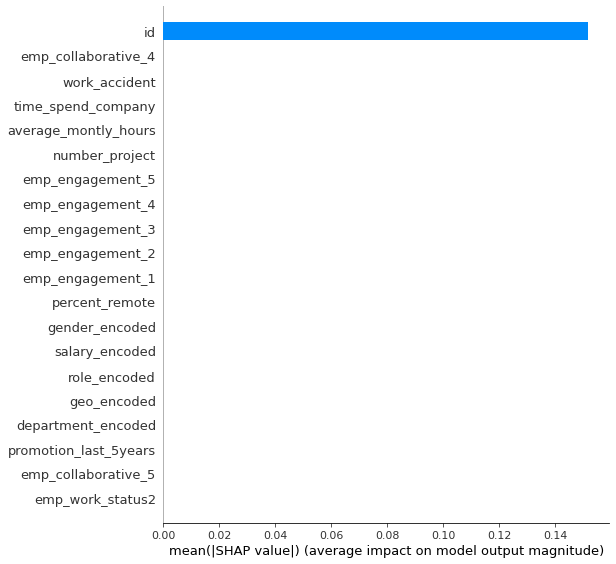

In [39]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Why is id influencing too much on model?**

In [40]:
X_train, X_val, y_train, y_val = train_test_split(features_df.drop('id', axis=1), y, test_size=0.50, random_state=101)

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
p = rf.predict(X_val)

In [43]:
print('MAE:',mean_absolute_error(y_val, p))
print('MSE:', mean_squared_error(y_val, p))

MAE: 0.05824679999999999
MSE: 0.005148596522666666


In [44]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, approximate=True)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


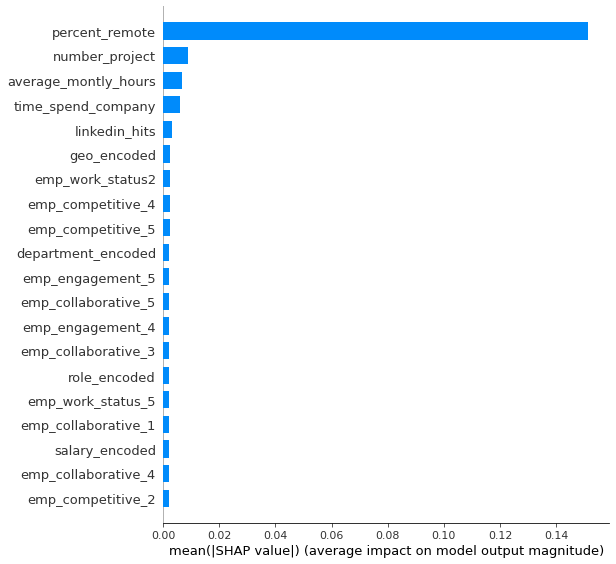

In [45]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Why percent remote has more impact on model prediction?**

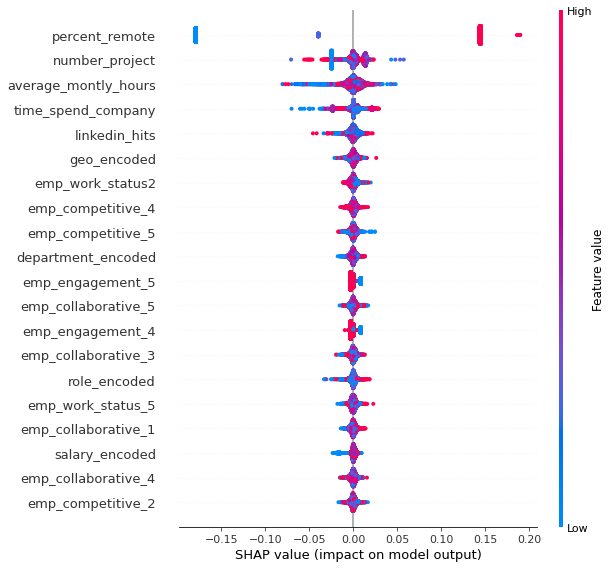

In [46]:
shap.summary_plot(shap_values, X_train)

lower values of percent_remote makes evaluation of an employee goes down
will remove this feature to see model behavior

In [47]:
X_train, X_val, y_train, y_val = train_test_split(features_df.drop(['id','percent_remote', 'linkedin_hits'], axis=1), y, test_size=0.50, random_state=101)

In [48]:
rf.fit(X_train, y_train)
p = rf.predict(X_val)

In [49]:
print('MAE:',mean_absolute_error(y_val, p))
print('MSE:', mean_squared_error(y_val, p))

MAE: 0.06825550666666667
MSE: 0.0070235634226666665


In [50]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, approximate=True)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


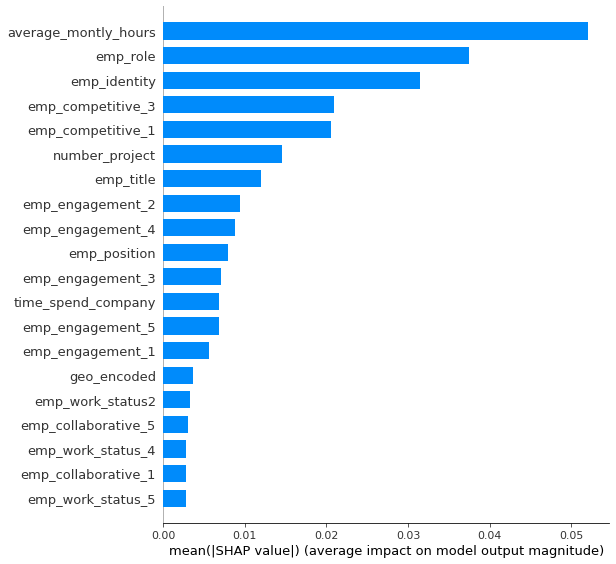

In [51]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [52]:
new_df['y_val'] = y_val
new_df['p'] = p.round(2)

In [53]:
new_df

,y_val,p
2786,0.53,0.52
9619,0.81,0.86
10356,0.84,0.86
2169,0.51,0.58
1139,0.48,0.57
...,...,...
4831,0.60,0.58
14374,0.98,0.84
13514,0.95,0.85
6724,0.68,0.60


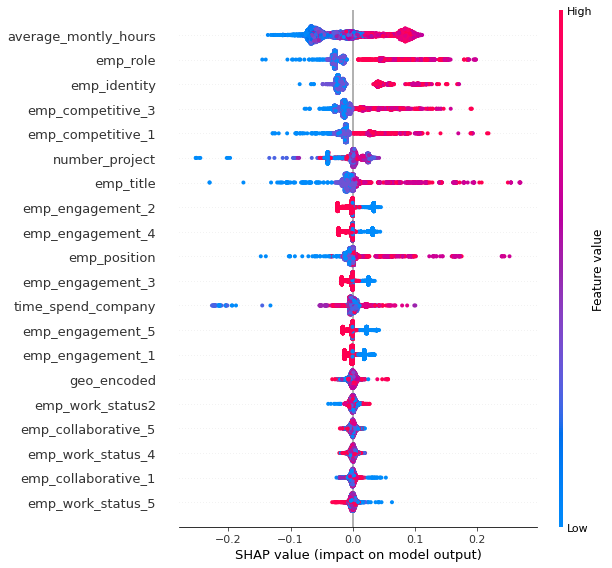

In [54]:
shap.summary_plot(shap_values, X_train)

**This shows:**
- High average_mothly_hours increase the evaluation value as the opposite
- Employee that identifies themselves more with the importance of their role in the company and also with the company at all has better evaluation

In [55]:
features_df.drop(['id','percent_remote', 'linkedin_hits'], axis=1, inplace=True)

In [56]:
# Competitive survey mean
competitive_columns = [column for column in features_df if 'emp_competitive' in column]

In [57]:
competitive_mean = round(df[competitive_columns].mean(axis=1))

In [58]:
features_df['competitive_mean'] = competitive_mean

In [59]:
features_df.drop(competitive_columns, axis=1, inplace=True)

In [60]:
# Engagement survey mean
engagement_columns = [column for column in features_df if 'emp_engagement' in column]

In [61]:
engagement_mean = round(df[engagement_columns].mean(axis=1))

In [62]:
features_df['engagement_mean'] = engagement_mean

In [63]:
features_df.drop(engagement_columns, axis=1, inplace=True)

In [64]:
# Work status survey mean
work_columns = [column for column in features_df if 'emp_work' in column]

In [65]:
work_mean = round(df[work_columns].mean(axis=1))

In [66]:
features_df['work_mean'] = work_mean

In [67]:
features_df.drop(work_columns, axis=1, inplace=True)

In [68]:
# Collaborative survey mean
collaborative_columns = [column for column in features_df if 'emp_collaborative' in column]

In [69]:
collaborative_mean = round(df[collaborative_columns].mean(axis=1))

In [70]:
features_df['collaborative_mean'] = collaborative_mean

In [71]:
features_df.drop(collaborative_columns, axis=1, inplace=True)

### Train with new features

In [72]:
features_df.head()

,department_encoded,geo_encoded,role_encoded,salary_encoded,gender_encoded,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,emp_identity,emp_role,emp_position,emp_title,competitive_mean,engagement_mean,work_mean,collaborative_mean
0,3,8,6,1,1,3,168,3,1,0,1,1,2,1,2.0,4.0,2.0,2.0
1,4,7,4,1,0,5,159,2,0,0,2,1,2,1,2.0,4.0,3.0,3.0
2,0,3,4,2,0,2,282,3,0,0,1,1,2,2,3.0,4.0,2.0,3.0
3,1,1,4,0,1,4,278,4,1,0,2,1,2,1,2.0,4.0,3.0,2.0
4,2,5,0,1,0,6,256,5,0,0,1,1,2,1,3.0,4.0,4.0,3.0


In [73]:
X_train, X_val, y_train, y_val = train_test_split(features_df.drop(['geo_encoded', 'department_encoded'], axis=1), y, test_size=0.50, random_state=101)

In [74]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
p = rf.predict(X_val)

In [76]:
print('MAE:',mean_absolute_error(y_val, p))
print('MSE:', mean_squared_error(y_val, p))

MAE: 0.069774518
MSE: 0.007630275496627038


In [77]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, approximate=True)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


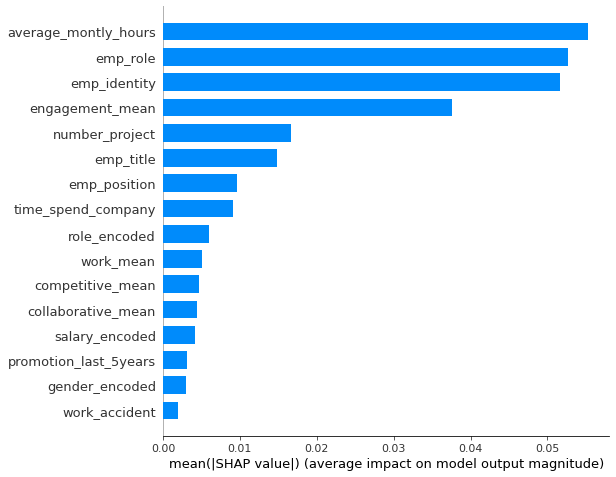

In [78]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [79]:
shap.force_plot(explainer.expected_value[0], shap_values[0,:], X_train.iloc[0,:])

____________________________________________________________________

In [82]:
features_df['percent_remote'] = df.percent_remote

In [84]:
X_train, X_val, y_train, y_val = train_test_split(features_df.drop(['geo_encoded', 'department_encoded'], axis=1), y, test_size=0.50, random_state=101)

In [85]:
rf.fit(X_train, y_train)
p = rf.predict(X_val)
print('MAE:',mean_absolute_error(y_val, p))
print('MSE:', mean_squared_error(y_val, p))

MAE: 0.05832855523809523
MSE: 0.005242076233039197


In [86]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, approximate=True)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


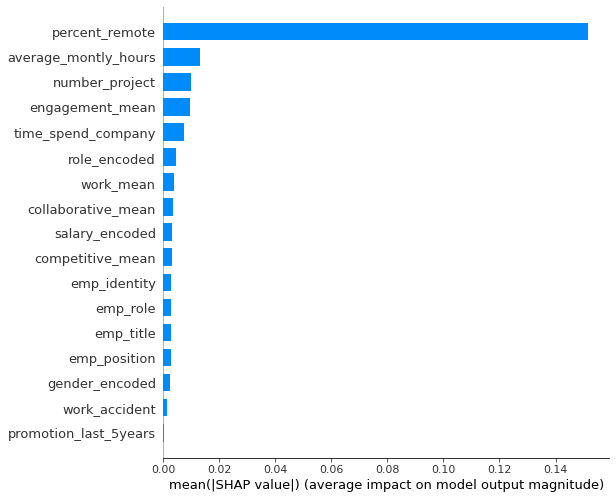

In [87]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [88]:
new_

In [89]:
new_df['y_val'] = y_val
new_df['p'] = p.round(2)

In [91]:
df.percent_remote.value_counts()

0.8    7853
0.4    6022
0.5    1112
1.0      12
Name: percent_remote, dtype: int64

In [95]:
df[df.percent_remote>0.5].last_evaluation.describe()

count    7865.000000
mean        0.859221
std         0.085057
min         0.700000
25%         0.790000
50%         0.860000
75%         0.930000
max         1.000000
Name: last_evaluation, dtype: float64

In [102]:
df[['percent_remote', 'last_evaluation', 'average_montly_hours', 'number_project']].corr()

,percent_remote,last_evaluation,average_montly_hours,number_project
percent_remote,1.000000,0.897223,0.317078,0.327387
last_evaluation,0.897223,1.000000,0.339742,0.349333
average_montly_hours,0.317078,0.339742,1.000000,0.417211
number_project,0.327387,0.349333,0.417211,1.000000


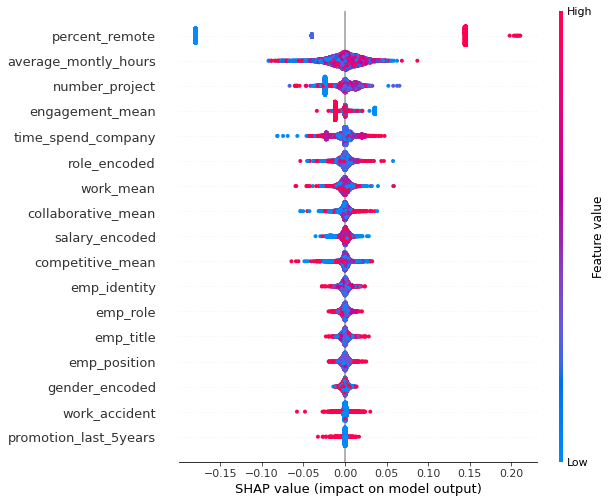

In [104]:
shap.summary_plot(shap_values, X_train)

**Higher values of percent remote usually have better evaluation  
the model also understood this, but it makes sense?**

In [105]:
# Train with less features to see what result we get
X_train, X_val, y_train, y_val = train_test_split(features_df.drop(['geo_encoded', 'department_encoded'], axis=1), y, test_size=0.50, random_state=101)

,department_encoded,geo_encoded,role_encoded,salary_encoded,gender_encoded,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,emp_identity,emp_role,emp_position,emp_title,competitive_mean,engagement_mean,work_mean,collaborative_mean,percent_remote
0,3,8,6,1,1,3,168,3,1,0,1,1,2,1,2.0,4.0,2.0,2.0,0.4
1,4,7,4,1,0,5,159,2,0,0,2,1,2,1,2.0,4.0,3.0,3.0,0.4
2,0,3,4,2,0,2,282,3,0,0,1,1,2,2,3.0,4.0,2.0,3.0,0.4
3,1,1,4,0,1,4,278,4,1,0,2,1,2,1,2.0,4.0,3.0,2.0,0.4
4,2,5,0,1,0,6,256,5,0,0,1,1,2,1,3.0,4.0,4.0,3.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,3,5,2,2,0,4,252,5,0,0,2,1,2,1,2.0,2.0,2.0,2.0,1.0
14995,4,0,2,2,0,4,232,5,0,0,1,2,2,1,3.0,2.0,2.0,4.0,1.0
14996,0,1,2,1,0,5,242,5,0,0,1,1,2,1,2.0,2.0,3.0,4.0,1.0
14997,1,8,2,2,1,5,223,6,0,0,1,2,1,1,2.0,2.0,2.0,2.0,1.0


In [106]:
features_df.columns

Index(['department_encoded', 'geo_encoded', 'role_encoded', 'salary_encoded',
       'gender_encoded', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'promotion_last_5years',
       'emp_identity', 'emp_role', 'emp_position', 'emp_title',
       'competitive_mean', 'engagement_mean', 'work_mean',
       'collaborative_mean', 'percent_remote'],
      dtype='object')

In [141]:
drop_columns = ['department_encoded', 'geo_encoded', 'role_encoded', 'salary_encoded', 'gender_encoded', 'work_accident','competitive_mean', 'engagement_mean', 'work_mean', 'collaborative_mean', 'percent_remote']

In [142]:
# Train with less features to see what result we get (less features, less computational power needed)
X_train, X_val, y_train, y_val = train_test_split(features_df.drop(drop_columns, axis=1), y, test_size=0.50, random_state=101)

In [143]:
rf.fit(X_train, y_train)
p = rf.predict(X_val)
print('MAE:',mean_absolute_error(y_val, p))
print('MSE:', mean_squared_error(y_val, p))

MAE: 0.07424417333333334
MSE: 0.009161309233333335


In [139]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, approximate=True)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


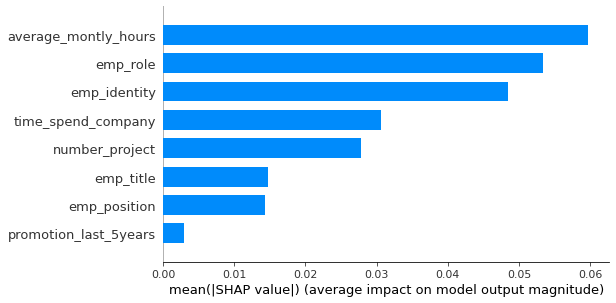

In [140]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [150]:
# Test with baseline LGBM
from lightgbm import LGBMRegressor

In [198]:
X_train, X_val, y_train, y_val = train_test_split(features_df.drop(['percent_remote', 'gender_encoded', 'geo_encoded'], axis=1), y, test_size=0.50, random_state=101)

In [200]:
lgbm = LGBMRegressor()

In [201]:
lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [202]:
p_lgbm = lgbm.predict(X_val)

In [203]:
print('MAE:',mean_absolute_error(y_val, p_lgbm))
print('MSE:', mean_squared_error(y_val, p_lgbm))

MAE: 0.0696794777320238
MSE: 0.0075684293604825975


In [204]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


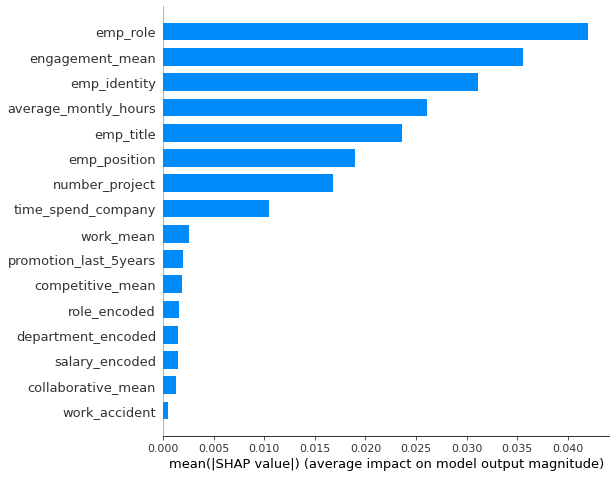

In [205]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

**Gender, geo, etc seems to have no good predict power**

In [209]:
# Will save to csv reduced feature dataset to use on model 2

features_df.to_csv('./data/features_model_1.csv')
y.to_csv('./data/target_model_1.csv')